In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
dataset = pd.read_csv('titanic.csv')

In [132]:
dataset.describe()

C:\Users\SANDEEP\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
dataset.Age = dataset.Age.fillna(dataset.Age.mean())

In [135]:
dataset.Embarked = dataset.Embarked.fillna(dataset.Embarked.mode()[0])

In [136]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [137]:
X = dataset.iloc [:,[2,4,5,6,7,9,11]].values
y = dataset.iloc [:,1].values

In [138]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder_sex = LabelEncoder()
X[:, 1] = X_labelencoder_sex.fit_transform(X[:, 1])

In [125]:
X

array([[3, 1, 22.0, ..., 0, 7.25, 'S'],
       [1, 0, 38.0, ..., 0, 71.2833, 'C'],
       [3, 0, 26.0, ..., 0, 7.925, 'S'],
       ..., 
       [3, 0, nan, ..., 2, 23.45, 'S'],
       [1, 1, 26.0, ..., 0, 30.0, 'C'],
       [3, 1, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [129]:
dataset['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [139]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder_embarked = LabelEncoder()
X[:, 6] = X_labelencoder_embarked.fit_transform(X[:, 6])

In [150]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [151]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [152]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
y_pred = regressor.predict(X_test)

In [154]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[93, 17],
       [20, 49]])

In [155]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.793296089385
Precision: 0.742424242424
Recall: 0.710144927536


In [156]:
y_pred_proba = regressor.predict_proba(X_test)[:,1]
y_pred_proba

array([ 0.14933961,  0.12711668,  0.07798295,  0.91633633,  0.65058253,
        0.41155592,  0.90829597,  0.92488614,  0.4655339 ,  0.66073487,
        0.10429081,  0.72337683,  0.13621999,  0.87040613,  0.93282459,
        0.72733574,  0.15196974,  0.24369211,  0.11074895,  0.28104993,
        0.30488532,  0.94391847,  0.13621375,  0.41206966,  0.67924339,
        0.87916726,  0.11982967,  0.67731109,  0.80456824,  0.57888824,
        0.13434242,  0.65736882,  0.13381877,  0.41670182,  0.09590422,
        0.43321417,  0.08873627,  0.24462982,  0.26364022,  0.13121938,
        0.21666779,  0.16383965,  0.13042397,  0.06218582,  0.8593625 ,
        0.12727953,  0.12727953,  0.94264181,  0.19064204,  0.2311868 ,
        0.41104237,  0.52245001,  0.84485109,  0.16725029,  0.44934233,
        0.19593297,  0.2074536 ,  0.43234189,  0.08642586,  0.07924744,
        0.17650755,  0.59600359,  0.79855135,  0.45975385,  0.62395502,
        0.12832378,  0.81500289,  0.25313496,  0.85412363,  0.91

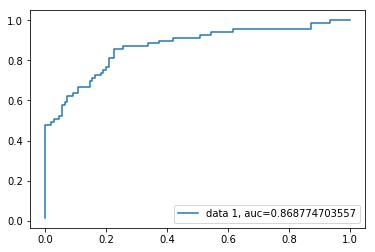

In [157]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()